In [4]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code")

from pre_process.imputation import *
from notebooks.plots import *

Test Imputation:

In [9]:
X, y, metadata = load_from_tsfile(
    "/usr/src/code/data/primary/AsphaltPavementTypeCoordinates/AsphaltPavementTypeCoordinates_TEST.ts",
    return_meta_data=True,
)

n_instances = 1
pmiss = 0.2
max_iter = 20

X = X[:n_instances]
n_variables = X.shape[1]
X_nan = create_nan_dataset(
    X.copy(), pmiss, n_instances, n_variables, nan_strategy="diff"
)
imputer = MissForest(max_iter=max_iter)
X_imp = impute(X_nan, n_instances, imputer)
X = X.swapaxes(1, 2)

100%|██████████| 1/1 [00:09<00:00,  9.98s/it]


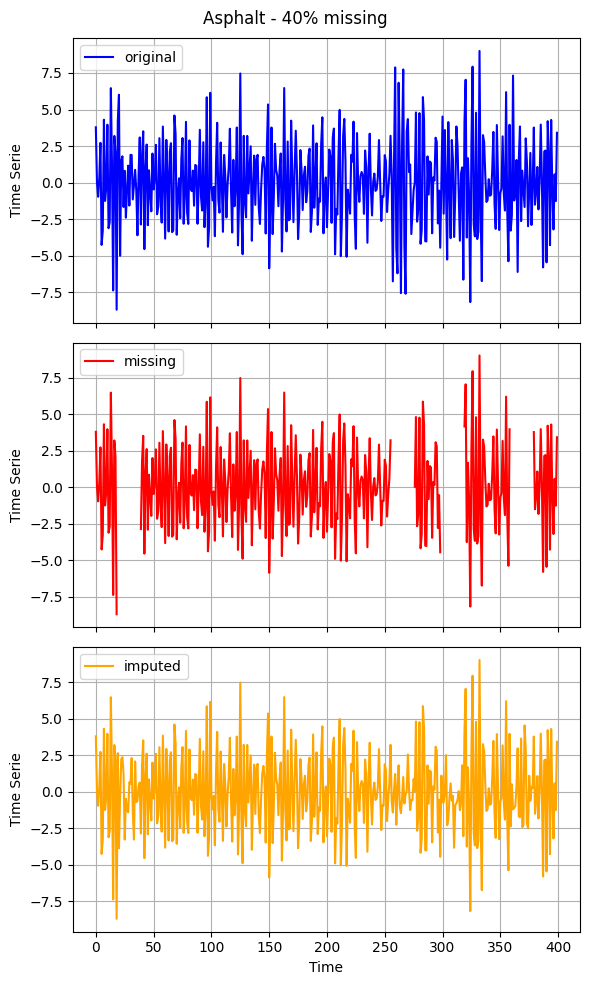

In [12]:
from plots import compare_imputation

instance = 0
n_test = 400
compare_imputation(
    X_nan[instance][:n_test],
    X_imp[instance][:n_test],
    X[instance][:n_test],
    title="Asphalt - 40% missing",
    ts_id=2,
)